<a href="https://colab.research.google.com/github/Giovannacm/nature-inspired-computing/blob/main/ACO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Universidade Estadual Paulista - UNESP

Programa de Pós-Graduação em Ciência da Computação

Disciplina: **Computação Inspirada pela Natureza** - Professor Fabricio Breve

**Trabalho 3** - Giovanna Carreira Marinho

Aplicar o ACO para encontar o menor caminho no problema do Caixeiro Viajante com 52 cidades.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Funções auxiliares

In [2]:
def getFeromonio(grafo, aresta_i, aresta_j):
  return grafo[aresta_i][aresta_j]

In [3]:
def accFeromonio(grafo, aresta_i, aresta_j, valor):
  if grafo[aresta_i][aresta_j] > 0:
    grafo[aresta_i][aresta_j] += valor
    grafo[aresta_j][aresta_i] += valor

In [4]:
def evaporaFeromonios(grafo, valor):
  len_vertices = len(grafo)
  for i in range(len_vertices):
    for j in range(len_vertices):
      if grafo[i][j] > 0:
        grafo[i][j] *= valor

In [5]:
def getVerticesAdjacentes(grafo, aresta):
  vizinhos = []
  feromonio = []
  len_vertices = len(grafo[aresta])
  for i in range(len_vertices):
    if grafo[aresta][i] > 0:
      vizinhos.append(i)
      feromonio.append(grafo[aresta][i])
  return vizinhos, feromonio

In [6]:
def geraPopulacao(tamanho, valor):
  formigas = []
  for i in range(tamanho):
    formigas.append([valor])
  return formigas

#ACO simples

In [7]:
def buscaMenorCaminho(grafo, p, origem, destino, quant_pop, max_it):
  t = 0
  while t < max_it:

    formigas = geraPopulacao(quant_pop, origem)

    for formiga in formigas:
      historico = formiga.copy()

      while destino not in formiga:
        vizinhos_real, feromonios_real = getVerticesAdjacentes(grafo, formiga[-1])

        vizinhos, feromonios = [], []
        for vertice in range(len(vizinhos_real)):
          if vizinhos_real[vertice] not in historico:
            vizinhos.append(vizinhos_real[vertice])
            feromonios.append(feromonios_real[vertice])

        proba = []
        for vertice in range(len(vizinhos)):
          proba.append(getFeromonio(grafo, formiga[-1], vizinhos[vertice]) / sum(feromonios))

        escolha = vizinhos[np.random.choice(np.arange(len(vizinhos)), p = proba)]

        formiga.append(escolha)
        historico.append(escolha)

    evaporaFeromonios(grafo, p)

    for formiga in formigas:
      for vertice in range(len(formiga) - 1):
        accFeromonio(grafo, formiga[vertice], formiga[vertice+1], 1/(len(formiga) - 1))

    print('\n--> Iteração:', t)
    for linha in grafo:
      print(linha)
    
    t += 1

In [8]:
grafo = [[0, 1, 1, 1],
         [1, 0, 1, 1],
         [1, 1, 0, 1],
         [1, 1, 1, 0]]
buscaMenorCaminho(grafo=grafo, p=0.5, origem=0, destino=3, quant_pop=5, max_it=4)


--> Iteração: 0
[0, 0.5, 2.1666666666666665, 1.5]
[0.5, 0, 1.1666666666666665, 1.1666666666666665]
[2.1666666666666665, 1.1666666666666665, 0, 1.5]
[1.5, 1.1666666666666665, 1.5, 0]

--> Iteração: 1
[0, 0.25, 2.4166666666666665, 2.75]
[0.25, 0, 0.9166666666666665, 0.9166666666666665]
[2.4166666666666665, 0.9166666666666665, 0, 1.75]
[2.75, 0.9166666666666665, 1.75, 0]

--> Iteração: 2
[0, 0.125, 2.708333333333333, 3.375]
[0.125, 0, 0.45833333333333326, 0.45833333333333326]
[2.708333333333333, 0.45833333333333326, 0, 2.375]
[3.375, 0.45833333333333326, 2.375, 0]

--> Iteração: 3
[0, 0.0625, 2.6875, 3.6875]
[0.0625, 0, 0.5625, 0.5625]
[2.6875, 0.5625, 0, 2.1875]
[3.6875, 0.5625, 2.1875, 0]


# Transformar arquivo em grafo

In [9]:
def fileToData():
  arquivo = open("/content/berlin52.tsp", "r")
  x_list = []
  y_list = []
  for linha in arquivo:
    if linha[0].isdigit():
      id, x, y = linha.split()
      x_list.append(float(x))
      y_list.append(float(y))
  return x_list, y_list

In [10]:
x_list, y_list = fileToData()

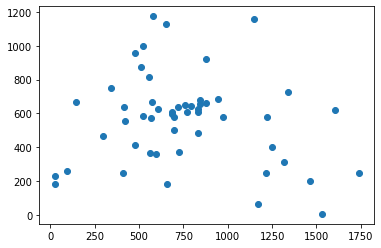

In [11]:
plt.scatter(x_list, y_list)
plt.show()

In [12]:
def distancia(a, b):
  a_array = np.array(a)
  b_array = np.array(b)
  return np.linalg.norm(a_array - b_array)

In [13]:
def dataToGraph(x, y, feromonio_inicial=10**(-6)):
  n = len(x)
  grafo_dist = []
  grafo_fero = []
  for i in range(n):
    dist = []
    fero = []
    for j in range(n):
      if i == j:
        dist.append(0)
        fero.append(0)
      else:
        dist.append(distancia([x[i], y[i]], [x[j], y[j]]))
        fero.append(feromonio_inicial)
    grafo_dist.append(dist)
    grafo_fero.append(fero)
  return grafo_dist, grafo_fero

# ACO-TSP

In [14]:
def geraPopulacao_2(tamanho):
  formigas = []
  for i in range(tamanho):
    formigas.append([i])
  return formigas

In [15]:
def getVerticesAdjacentes_2(grafo_dist, grafo_fero, aresta):
  vizinhos = []
  feromonio = []
  len_vertices = len(grafo_dist[aresta])
  for i in range(len_vertices):
    if grafo_dist[aresta][i] > 0:
      vizinhos.append(i)
      feromonio.append(grafo_fero[aresta][i])
  return vizinhos, feromonio

In [16]:
def somaVizinhos(grafo, formiga, vizinhos, visibilidade, alfa, beta):
  sum = 0
  for vizinho in vizinhos:
    sum += (getFeromonio(grafo, formiga, vizinho)**alfa) * (visibilidade**beta)
  return sum

In [17]:
def avaliaRota(formiga, grafo_dist):
  acc = 0
  n = len(formiga)
  for i in range(n - 1):
    acc += grafo_dist[formiga[i]][formiga[i+1]]
  return acc

In [18]:
def buscaMenorCaminho_2(grafo_dist, grafo_fero, p, alfa, beta, Q, b, quant_pop, max_it, print_info=True):
  historico_sol = {'it': [], 'd': []}
  quant_cidades = len(grafo_dist)
  melhor_rota = []
  melhor_custo = np.inf
  t = 0
  while t < max_it:
    formigas = geraPopulacao_2(quant_pop)

    for formiga in formigas:
      historico = formiga.copy() #armazenando o historico do caminho

      while len(formiga) != quant_cidades:
        vizinhos_real, feromonios_real = getVerticesAdjacentes_2(grafo_dist, grafo_fero, formiga[-1])
        vizinhos, feromonios = [], []
        for vertice in range(len(vizinhos_real)): #removendo aqueles vizinhos que ja foram visitados
          if vizinhos_real[vertice] not in historico:
            vizinhos.append(vizinhos_real[vertice])
            feromonios.append(feromonios_real[vertice])

        proba = []
        for vertice in range(len(vizinhos)): #gerando as probabilidades para cada vizinho
          visibilidade = 1 / (grafo_dist[formiga[-1]][vizinhos[vertice]])
          num = (getFeromonio(grafo_fero, formiga[-1], vizinhos[vertice])**alfa) * (visibilidade**beta)
          deno = somaVizinhos(grafo_fero, formiga[-1], vizinhos, visibilidade, alfa, beta)
          proba.append(num / deno)

        escolha = vizinhos[np.random.choice(np.arange(len(vizinhos)), p = proba)]
        formiga.append(escolha)
        historico.append(escolha)

      formiga.append(formiga[0])

    melhor_iteracao = np.inf
    for formiga in formigas: #verificando as rotas das formigas em busca de uma melhor solucao global e verificando a melhor na iteracao
      rota = avaliaRota(formiga, grafo_dist)
      if rota < melhor_custo:
        melhor_custo = rota
        melhor_rota = formiga
      if rota < melhor_iteracao:
        melhor_iteracao = rota
    historico_sol['it'].append(t)
    historico_sol['d'].append(melhor_iteracao)
    
    evaporaFeromonios(grafo_fero, 1 - p)

    for formiga in formigas:
      for vertice in range(len(formiga) - 1):
        feromonio_depositado = Q/(len(formiga) - 1)
        accFeromonio(grafo_fero, formiga[vertice], formiga[vertice+1], feromonio_depositado)
    
    #formiga elitista
    for vertice in range(len(melhor_rota) - 1):
      feromonio_depositado = Q/(len(melhor_rota) - 1)
      accFeromonio(grafo_fero, melhor_rota[vertice], melhor_rota[vertice+1], b*feromonio_depositado)

    if print_info:
      print('--> Iteração:', t)
      print(' Melhor custo:', melhor_custo, '|', melhor_rota, '\n')
    
    t += 1

  return melhor_custo, melhor_rota, historico_sol

## Teste com algumas cidades

In [19]:
grafo_dist, grafo_fero = dataToGraph(x_list[:10], y_list[:10])

In [20]:
melhor_custo, melhor_rota, historico_sol = buscaMenorCaminho_2(grafo_dist=grafo_dist, grafo_fero=grafo_fero, p=0.5, alfa=1, beta=5, Q=100, b=5, quant_pop=len(grafo_dist), max_it=100, print_info=True)

--> Iteração: 0
 Melhor custo: 4284.162184425919 | [5, 0, 4, 2, 7, 8, 9, 3, 1, 6, 5] 

--> Iteração: 1
 Melhor custo: 3818.4159859109973 | [4, 3, 9, 8, 7, 0, 5, 6, 1, 2, 4] 

--> Iteração: 2
 Melhor custo: 3818.4159859109973 | [4, 3, 9, 8, 7, 0, 5, 6, 1, 2, 4] 

--> Iteração: 3
 Melhor custo: 3555.865685688971 | [7, 2, 1, 6, 5, 0, 4, 3, 8, 9, 7] 

--> Iteração: 4
 Melhor custo: 3555.865685688971 | [7, 2, 1, 6, 5, 0, 4, 3, 8, 9, 7] 

--> Iteração: 5
 Melhor custo: 3555.865685688971 | [7, 2, 1, 6, 5, 0, 4, 3, 8, 9, 7] 

--> Iteração: 6
 Melhor custo: 3555.865685688971 | [7, 2, 1, 6, 5, 0, 4, 3, 8, 9, 7] 

--> Iteração: 7
 Melhor custo: 3555.865685688971 | [7, 2, 1, 6, 5, 0, 4, 3, 8, 9, 7] 

--> Iteração: 8
 Melhor custo: 3555.865685688971 | [7, 2, 1, 6, 5, 0, 4, 3, 8, 9, 7] 

--> Iteração: 9
 Melhor custo: 3317.7072509813697 | [2, 1, 6, 0, 7, 9, 8, 4, 5, 3, 2] 

--> Iteração: 10
 Melhor custo: 2990.6914089899797 | [9, 8, 4, 3, 5, 0, 6, 1, 2, 7, 9] 

--> Iteração: 11
 Melhor custo: 2990.6

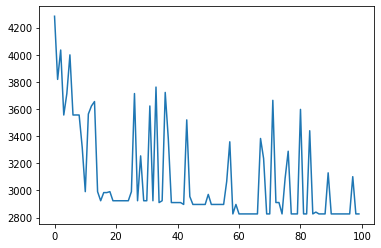

In [21]:
plt.plot(historico_sol['it'], historico_sol['d'])
plt.show()

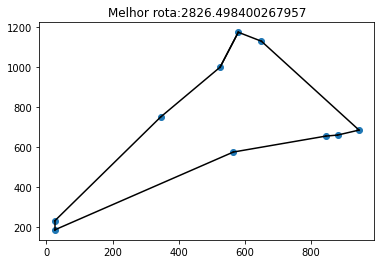

In [22]:
plt.scatter(x_list[:10], y_list[:10])
n = len(melhor_rota)
for i in range(n - 1):
  p1_x = x_list[:10][melhor_rota[i]]
  p1_y = y_list[:10][melhor_rota[i]]
  p2_x = x_list[:10][melhor_rota[i+1]]
  p2_y = y_list[:10][melhor_rota[i+1]]
  plt.plot([p1_x, p2_x], [p1_y, p2_y], 'black')
plt.plot([p1_x, p2_x], [p1_y, p2_y], 'black')
plt.title('Melhor rota:' + str(melhor_custo))
plt.show()

## Teste com todas cidades: 200 iterações

In [23]:
grafo_dist, grafo_fero = dataToGraph(x_list, y_list)

In [24]:
melhor_custo, melhor_rota, historico_sol = buscaMenorCaminho_2(grafo_dist=grafo_dist, grafo_fero=grafo_fero, p=0.5, alfa=1, beta=5, Q=100, b=5, quant_pop=len(grafo_dist), max_it=200, print_info=True)

--> Iteração: 0
 Melhor custo: 22704.68701067158 | [29, 25, 6, 19, 44, 50, 26, 46, 12, 51, 45, 23, 48, 35, 43, 14, 37, 24, 18, 9, 8, 17, 2, 13, 32, 42, 1, 28, 49, 3, 15, 38, 36, 33, 30, 16, 4, 7, 40, 11, 5, 22, 41, 39, 21, 31, 0, 47, 27, 10, 34, 20, 29] 

--> Iteração: 1
 Melhor custo: 22704.68701067158 | [29, 25, 6, 19, 44, 50, 26, 46, 12, 51, 45, 23, 48, 35, 43, 14, 37, 24, 18, 9, 8, 17, 2, 13, 32, 42, 1, 28, 49, 3, 15, 38, 36, 33, 30, 16, 4, 7, 40, 11, 5, 22, 41, 39, 21, 31, 0, 47, 27, 10, 34, 20, 29] 

--> Iteração: 2
 Melhor custo: 22704.68701067158 | [29, 25, 6, 19, 44, 50, 26, 46, 12, 51, 45, 23, 48, 35, 43, 14, 37, 24, 18, 9, 8, 17, 2, 13, 32, 42, 1, 28, 49, 3, 15, 38, 36, 33, 30, 16, 4, 7, 40, 11, 5, 22, 41, 39, 21, 31, 0, 47, 27, 10, 34, 20, 29] 

--> Iteração: 3
 Melhor custo: 22704.68701067158 | [29, 25, 6, 19, 44, 50, 26, 46, 12, 51, 45, 23, 48, 35, 43, 14, 37, 24, 18, 9, 8, 17, 2, 13, 32, 42, 1, 28, 49, 3, 15, 38, 36, 33, 30, 16, 4, 7, 40, 11, 5, 22, 41, 39, 21, 31, 0, 47

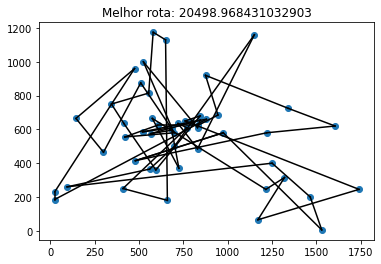

In [28]:
plt.scatter(x_list, y_list)
n = len(melhor_rota)
for i in range(n - 1):
  p1_x = x_list[melhor_rota[i]]
  p1_y = y_list[melhor_rota[i]]
  p2_x = x_list[melhor_rota[i+1]]
  p2_y = y_list[melhor_rota[i+1]]
  plt.plot([p1_x, p2_x], [p1_y, p2_y], 'black')
plt.plot([p1_x, p2_x], [p1_y, p2_y], 'black')
plt.title('Melhor rota: ' + str(melhor_custo))
plt.show()

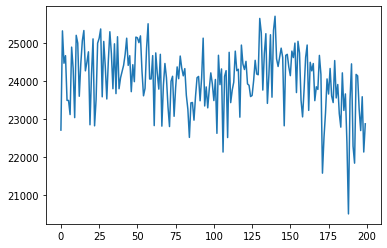

In [29]:
plt.plot(historico_sol['it'], historico_sol['d'])
plt.show()

## Teste com todas cidades: 1000 iterações

In [31]:
grafo_dist, grafo_fero = dataToGraph(x_list, y_list)

In [ ]:
melhor_custo, melhor_rota, historico_sol = buscaMenorCaminho_2(grafo_dist=grafo_dist, grafo_fero=grafo_fero, p=0.5, alfa=1, beta=5, Q=100, b=5, quant_pop=len(grafo_dist), max_it=1000, print_info=False)

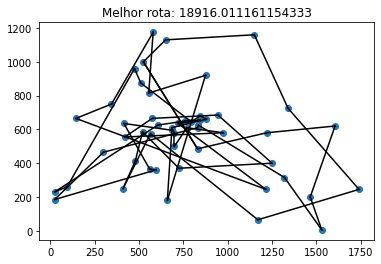

In [33]:
plt.scatter(x_list, y_list)
n = len(melhor_rota)
for i in range(n - 1):
  p1_x = x_list[melhor_rota[i]]
  p1_y = y_list[melhor_rota[i]]
  p2_x = x_list[melhor_rota[i+1]]
  p2_y = y_list[melhor_rota[i+1]]
  plt.plot([p1_x, p2_x], [p1_y, p2_y], 'black')
plt.plot([p1_x, p2_x], [p1_y, p2_y], 'black')
plt.title('Melhor rota: ' + str(melhor_custo))
plt.show()

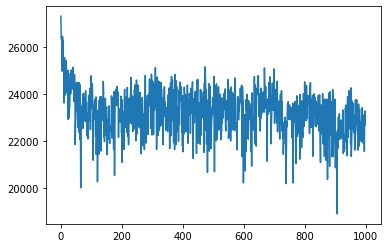

In [34]:
plt.plot(historico_sol['it'], historico_sol['d'])
plt.show()